**Practice Problem: Predict Number of Upvotes**
An online question and answer platform has hired you as a data scientist to identify the best question authors on the platform. This identification will bring more insight into increasing the user engagement. Given the tag of the question, number of views received, number of answers, username and reputation of the question author, the problem requires you to predict the upvote count that the question will receive.

**link** : - https://datahack.analyticsvidhya.com/contest/enigma-codefest-machine-learning-1/

**Himanshu Tripathi**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv('train_NIR5Yl1.csv')
test = pd.read_csv('test_8i3B3FC.csv')

In [4]:
train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


**Check For Null Values**



In [5]:
# check in Train data
print(train.isnull().sum())
print("*"*50)
# check in Train data
print(test.isnull().sum())

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64
**************************************************
ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64


In [6]:
train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


**EDA**

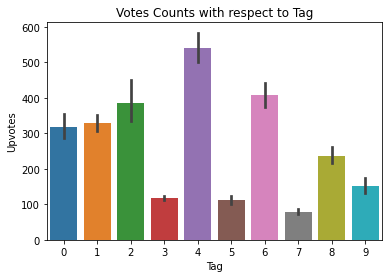

In [102]:
sns.barplot(x=train['Tag'],y=train['Upvotes'])
plt.title("Votes Counts with respect to Tag");

# With this graph we can see that the Tag J has most Upvotes 

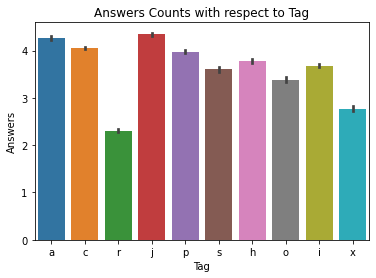

In [8]:
sns.barplot(x=train['Tag'],y=train['Answers'])
plt.title("Answers Counts with respect to Tag");

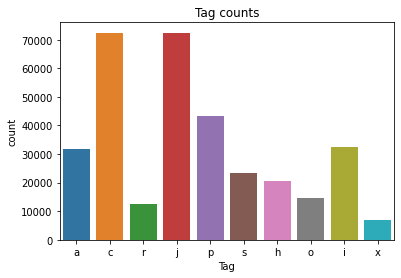

In [9]:
sns.countplot(train['Tag'])
plt.title('Tag counts');

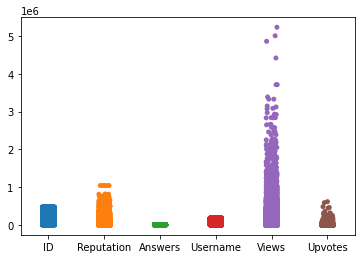

In [10]:
sns.stripplot(data=train)

**Check for the values which is more correlated with Upvotes**

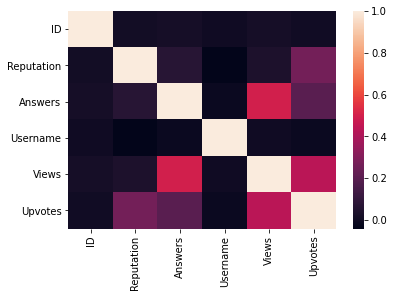

In [11]:
sns.heatmap(train.corr())

**With The help or correlation matrix we can see that ID and Username values with resepct to Upvotes is less so we can delete these columns**

First I try with the manual values for the encoding the catagorical values.
But not get much good accuracy...

In [0]:
# for test test also
test['Tag'] = test['Tag'].map({
    'a':0,
    'c':1,
    'r':2,
    'j':3,
    'p':4,
    's':5,
    'h':6,
    'o':7,
    'i':8,
    'x':9
})

In [0]:
train['Tag'] = train['Tag'].map({
    'a':0,
    'c':1,
    'r':2,
    'j':3,
    'p':4,
    's':5,
    'h':6,
    'o':7,
    'i':8,
    'x':9
})


**Then Use LabelEncoder for encoding**


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
labelencoder_X = LabelEncoder()
train['Tag'] = labelencoder_X.fit_transform(train['Tag'])

In [0]:
test['Tag'] = labelencoder_X.fit_transform(test['Tag'])

In [0]:
train = train.drop(['ID','Username'],axis=1)

In [0]:
ID = test['ID']

In [0]:
test = test.drop(['Username','ID'],axis=1)

In [89]:
train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0


In [93]:
test.head()

,Tag,Reputation,Answers,Views
0,0,5645.0,3.0,33200.0
1,1,24511.0,6.0,2730.0
2,3,927.0,1.0,21167.0
3,3,21.0,6.0,18528.0
4,3,4475.0,10.0,57240.0


In [0]:
from sklearn.preprocessing import MinMaxScaler

X_train = train.drop("Upvotes", axis=1)
Y_train = train["Upvotes"].values

# for the testing 
X_test = test
# min max scaler
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled)

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(np_scaled)

In [95]:
X_train.shape, Y_train.shape, X_test.shape

((330045, 4), (330045,), (141448, 4))

**Polynomial Regression**


In [0]:
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model

In [0]:
from sklearn.preprocessing import PolynomialFeatures 

In [96]:
poly_reg = PolynomialFeatures(degree = 5,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train, Y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.021,max_iter=150)
lin_reg_1.fit(X_poly, Y_train)


LassoLars(alpha=0.021, copy_X=True, eps=2.220446049250313e-16,
          fit_intercept=True, fit_path=True, max_iter=150, normalize=True,
          positive=False, precompute='auto', verbose=False)

In [0]:
# predicitng 
pred_val = lin_reg_1.predict(poly_reg.fit_transform(X_test))

In [0]:
submission = pd.DataFrame({
    'ID':ID,
    "Upvotes":pred_val
})

In [99]:
submission.head()

,ID,Upvotes
0,366953,217.066702
1,71864,94.530127
2,141692,43.460356
3,316833,24.003326
4,440445,296.334709


In [0]:
submission.to_csv("submission.csv",index=False)